<a href="https://colab.research.google.com/github/wanchenlang-max/econ5200-assignment2/blob/main/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Environment ready.")

Environment ready.


In [2]:
import numpy as np

np.random.seed(42)

normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)

latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [3]:
def calculate_mad(data):
    median = np.median(data)
    deviations = np.abs(data - median)
    mad = np.median(deviations)
    return mad

In [4]:
sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

sd, mad

(np.float64(458.8918490003935), np.float64(8.0))

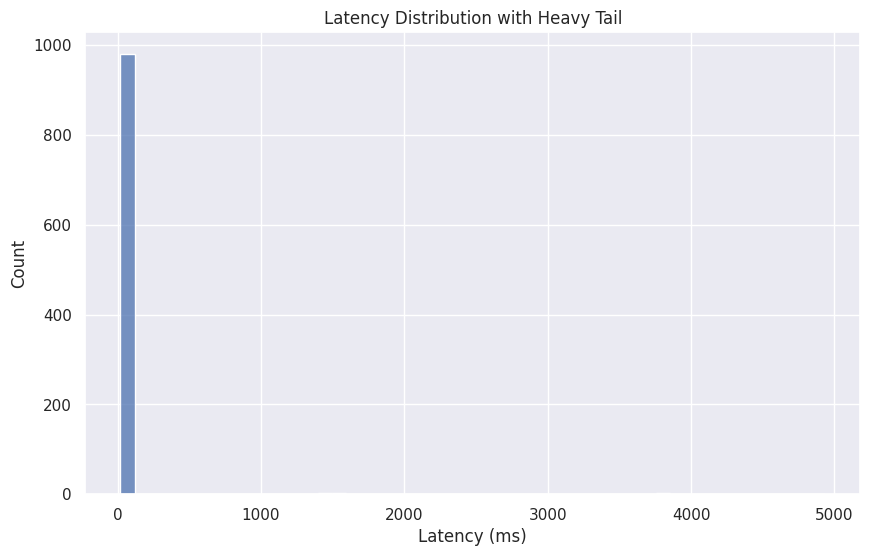

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(latency_logs, bins=50)
plt.title("Latency Distribution with Heavy Tail")
plt.xlabel("Latency (ms)")
plt.show()

### Analysis


The standard deviation becomes exceptionally high because it squares the differences from the mean, which amplifies the influence of the 20 extreme latency spikes. As a result, these outliers heavily distort the overall metric. By comparison, the MAD relies on the median and uses absolute deviations, making it far less sensitive to a limited number of extreme values. This illustrates that in skewed distributions, standard deviation can be unreliable, whereas MAD provides a more robust measure of variability.


In [ ]:
def bayesian_audit(prior, sensitivity, specificity):
    # P(Cheater | Flagged)
    numerator = sensitivity * prior
    denominator = numerator + (1 - specificity) * (1 - prior)
    return numerator / denominator

In [ ]:
sensitivity = 0.98
specificity = 0.98

scenario_A = bayesian_audit(0.50, sensitivity, specificity)
scenario_B = bayesian_audit(0.05, sensitivity, specificity)
scenario_C = bayesian_audit(0.001, sensitivity, specificity)

scenario_A, scenario_B, scenario_C

(0.98, 0.7205882352941175, 0.04675572519083965)

### Phase 2 Analysis

Even when a detection system performs with very high accuracy, the probability that a flagged student is actually cheating is strongly influenced by the underlying base rate. In settings where cheating is rare—such as an honors seminar—the majority of positive alerts will in fact be false alarms. This highlights the false positive paradox and illustrates why relying solely on overall accuracy can lead to misleading conclusions.

In [6]:
import numpy as np

# Observed counts
observed = np.array([50250, 49750])

# Expected counts (50/50 split)
expected = np.array([50000, 50000])

# Manual Chi-Square calculation
chi_square = np.sum((observed - expected) ** 2 / expected)

chi_square

np.float64(2.5)

### Phase 3 Conclusion


Since the Chi-Square test statistic is greater than the critical threshold of 3.84, we conclude that the difference in sample proportions is statistically significant. This imbalance implies that the experiment’s results are likely compromised by implementation or logging bias, rather than reflecting a genuine treatment effect.


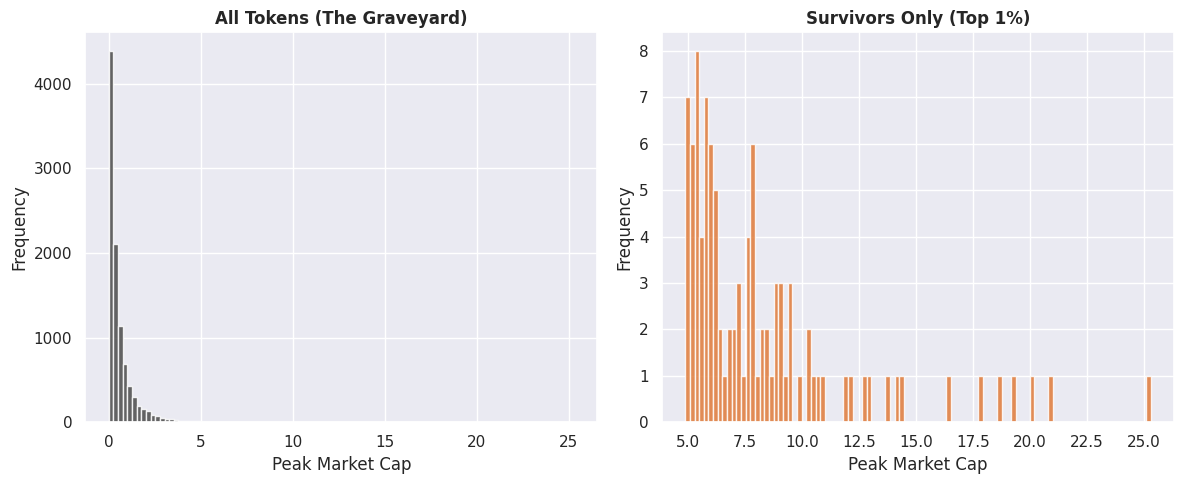

Mean Market Cap (All Tokens):      0.6360
Mean Market Cap (Survivors Only):  8.2626
Survivorship Bias Factor:          13.0x


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Number of token launches
n_tokens = 10000

# Simulate peak market caps using a Pareto distribution
# Heavy-tailed: most near zero, few extreme winners
alpha = 2.5
market_caps = np.random.pareto(alpha, n_tokens)

# Create full dataset (the graveyard)
df_all = pd.DataFrame({
    "peak_market_cap": market_caps
})

# Survivors: top 1%
threshold = np.percentile(df_all["peak_market_cap"], 99)
df_survivors = df_all[df_all["peak_market_cap"] >= threshold]

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_all["peak_market_cap"], bins=100, color="#4a4a4a", edgecolor="white", alpha=0.85)
plt.title("All Tokens (The Graveyard)", fontweight="bold")
plt.xlabel("Peak Market Cap")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df_survivors["peak_market_cap"], bins=100, color="#e07b39", edgecolor="white", alpha=0.85)
plt.title("Survivors Only (Top 1%)", fontweight="bold")
plt.xlabel("Peak Market Cap")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Compare means
mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print(f"Mean Market Cap (All Tokens):      {mean_all:.4f}")
print(f"Mean Market Cap (Survivors Only):  {mean_survivors:.4f}")
print(f"Survivorship Bias Factor:          {mean_survivors/mean_all:.1f}x")